# Linear Classification
In this first part we are going to illustrate a multi-class classification problems. T

Let's first generate some synthetic data that allows us to demonstrate the problem.

In [69]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelBinarizer,  PolynomialFeatures

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.rcParams['figure.figsize'] = [10, 10]

In [70]:
K=3
sample_size = [600, 600, 600]
centers=[[1, 1], [10, 10], [20,20]]
stds=[1, 1.5, 2]
X, y = make_blobs(n_samples=sample_size, centers=centers, cluster_std=stds, n_features=2, random_state=0)

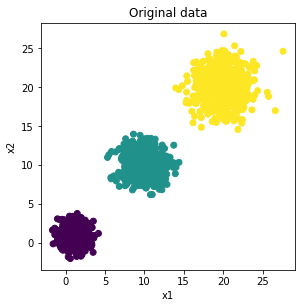

In [71]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original data')
plt.show()

# Linear Discriminant Analysis
Now, let's implement LDA and see how does our classification problem looks like.

<p>We will pretend not to know the means of our three classes</p>

In [72]:
#Let's estimate the parameters.
N = np.sum(sample_size)
proportions = sample_size / np.sum(sample_size)

means = []
for k in range(0,K):
    means.append(((y == k).dot(X[:,:])) / sample_size[k])
    
cov_per_class = []
for k in range(0,K):
    squared_term = (X[:,1:] - means[k])**2
    cov_per_class.append(((y == k).dot(squared_term)))
    
covariance = np.sum(cov_per_class,axis=0)/(N-K)

print('Prior:', proportions)
print('Means:', means)
print('Covariance:', covariance)

Prior: [0.33333333 0.33333333 0.33333333]
Means: [array([0.98825492, 0.96834315]), array([ 9.90717798, 10.03119458]), array([19.84559908, 20.01590891])]
Covariance: [2.34643782 2.33148556]


In [73]:
#Now let's estimate the linear discriminant functions for each sample

mean_over_covariance = np.divide(means,covariance)
log_prior = np.log(proportions)

ldf = np.array([])
for k in range(0,K):
    ldf_tmp = (X[:,:].dot(mean_over_covariance[k,:])-0.5*means[k].dot(mean_over_covariance[k]) - log_prior[k]).reshape(-1,1)

    if k > 0:
        ldf = np.append(ldf, ldf_tmp, axis = 1) 
    else:
        ldf = ldf_tmp                         

y_hat_lda = np.argmax(ldf, axis=1)

In [74]:
def get_x1_lda(covariance, mean_1, mean_2, prior_1, prior_2, x2):
    '''Auxiliary function to obtain the decision boundaries of the classifier when using LDA. 
    Works for only 2-D input spaces'''
    
    b1 = np.divide(mean_1,covariance)
    b2 = np.divide(mean_2,covariance)

    a1 = -0.5*mean_1.dot(b1) + np.log(prior_1)
    a2 = (-0.5*mean_2.dot(b2) + np.log(prior_2)) 

    x1 = ((a2 - a1) + (b2[1] - b1[1])*x2)/(b1[0]-b2[0])
    
    return x1

In [75]:
x_min = 0
x_max = 20

h = 1
xx = np.arange(x_min, x_max, h)

In [76]:
line_1_lda_x1= get_x1_lda(covariance, means[0], means[1], proportions[1], proportions[2], xx)
line_2_lda_x1= get_x1_lda(covariance, means[1], means[2], proportions[2], proportions[1], xx)

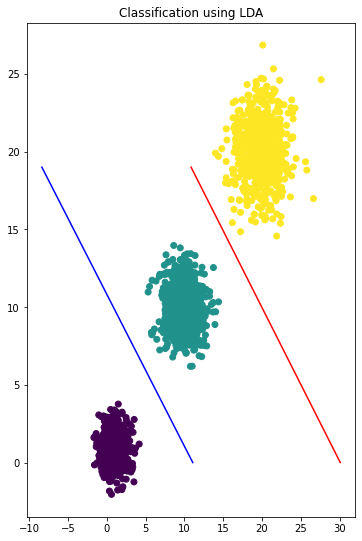

In [77]:
plt.rcParams['figure.figsize'] = [20, 20]
plt.subplot(231)
plt.scatter(X[:, 0], X[:, 1], c=y_hat_lda)
plt.plot(line_1_lda_x1,xx, c="blue")
plt.plot(line_2_lda_x1,xx, c="red")
plt.title('Classification using LDA')
plt.show()

**Exercise:** Refactor the provided and create a function LDA_classifier that receives as parameters the input $X$ and the ground truth $y$. It should return the model parameters. Then create another function called predict_LDA that received the parameters and some input data $X$. Use these two functions to test the LDA classifier over more complex datasets. Part of the exercise includes you exploring ways to generate more complex synthetic data.

# Logistic Regression
Finally, we are going to solve our problem using logistic regression. In this case, we are gonna use the built in function of scikit-learn.

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
logreg.fit(X[:,:], y)
y_hat_lr = logreg.predict(X[:,:])

In [80]:
def boundaries_lr(w0_1, w0_2, W_1, W_2, x2):
    '''Auxiliary function to determine the boundaries W0_1 + W_1^Tx = W0_2 + W_2^Tx: 
       Notice that the final expression is pretty much the same for every case:
       linear regresion, lda or logistic regression'''
    
    x1= ((w0_2 - w0_1) + (W_2[1] - W_1[1])*x2)/(W_1[0] - W_2[0])
    return x1

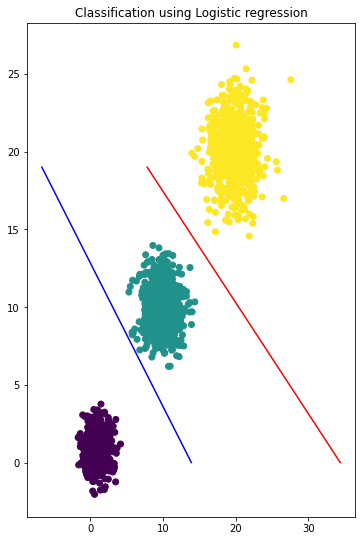

In [81]:
line_1_lr_x1= boundaries_lr(logreg.intercept_[0],logreg.intercept_[1], logreg.coef_[0],logreg.coef_[1], xx)
line_2_lr_x1= boundaries_lr(logreg.intercept_[1],logreg.intercept_[2], logreg.coef_[1],logreg.coef_[2], xx)
plt.subplot(231)
plt.scatter(X[:, 0], X[:, 1], c=y_hat_lr)
plt.plot(line_1_lr_x1,xx, c="blue")
plt.plot(line_2_lr_x1,xx, c="red")
plt.title('Classification using Logistic regression')
plt.show()



## In summary

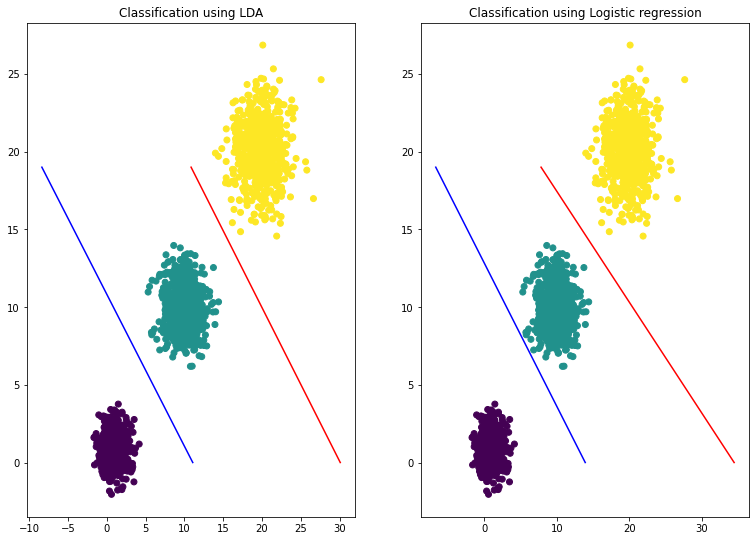

In [82]:
x_min = 0
x_max = 20

h = 1
xx = np.arange(x_min, x_max, h)

plt.subplot(232)
plt.scatter(X[:, 0], X[:, 1], c=y_hat_lda)
plt.plot(line_1_lda_x1,xx, c="blue")
plt.plot(line_2_lda_x1,xx, c="red")
plt.title('Classification using LDA')

plt.subplot(233)
plt.scatter(X[:, 0], X[:, 1], c=y_hat_lr)
plt.plot(line_1_lr_x1,xx, c="blue")
plt.plot(line_2_lr_x1,xx, c="red")
plt.title('Classification using Logistic regression')
plt.show()

# Appendix: The sigmoid function
A demonstration of the sigmoid function equivalent representations

In [83]:
x_min = -5
x_max = 5

h = 0.01
xx = np.arange(x_min, x_max, h)

y1 = 1/(1+np.exp(-xx))
y2 = np.divide(np.exp(xx),(1+np.exp(xx)))
y3 = 1 - (1/(1+np.exp(xx)))

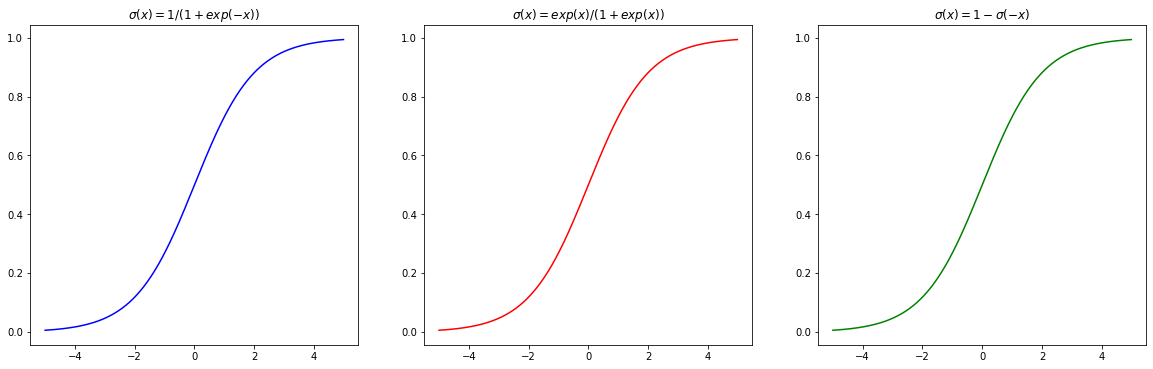

In [84]:
plt.subplot(331)
plt.plot(xx,y1, c="blue")
plt.title('$\sigma(x)=1/(1+exp(-x))$')
plt.subplot(332)
plt.plot(xx,y2, c="red")
plt.title('$\sigma(x)=exp(x)/(1+exp(x))$')
plt.subplot(333)
plt.title('$\sigma(x)=1-\sigma(-x)$')
plt.plot(xx,y3, c="green")

plt.show()